In [1]:
# importera bibliotek
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# skapa dataframes och läs in väder- och försäljningsdata
df_sales = pd.read_csv('SumUp-SalesReport_8.6.2022-15.8.2022.csv')
df_weather = pd.read_csv('FMI-WeatherData_8.6.2022-15.8.2022.csv')

In [3]:
# formatera datum och tid
df_sales['Date'] = pd.to_datetime(df_sales['Date']) # formatera datum (försäljning)
df_weather['Date'] = pd.to_datetime(df_weather[['Year', 'Month', 'Day']]) # skapa ny kolumn för formaterat datum (väder)
df_weather['Time'] = pd.to_datetime(df_weather['Time [Local time]'], format='%H:%M').dt.time # skapa ny kolumn för formaterad tid (väder)

In [4]:
# skapa filtrerad vädertabell för ungefärliga öppethållningstider (11:00-20:00)
filtered_weather = df_weather[(df_weather['Time'] >= pd.to_datetime('11:00').time()) & 
                              (df_weather['Time'] <= pd.to_datetime('20:00').time())]

In [5]:
# skapa pivottabeller
# 1. total försäljning/dag
sales_pivot = df_sales.pivot_table(
    values='Price (Gross)',
    index='Date',
    aggfunc='sum'
)
# 2. medeltemperatur/dag under öppethållningstider
weather_pivot = filtered_weather.pivot_table(
    values='Air temperature [°C]',
    index='Date',
    aggfunc='mean'
)

In [6]:
# kombinera pivottabeller enligt datum
merged_data = pd.merge(sales_pivot, weather_pivot, on='Date')

In [7]:
# ta bort avvikande dagar
merged_data = merged_data.drop(['2022-06-11']) # ovanligt hög försäljning

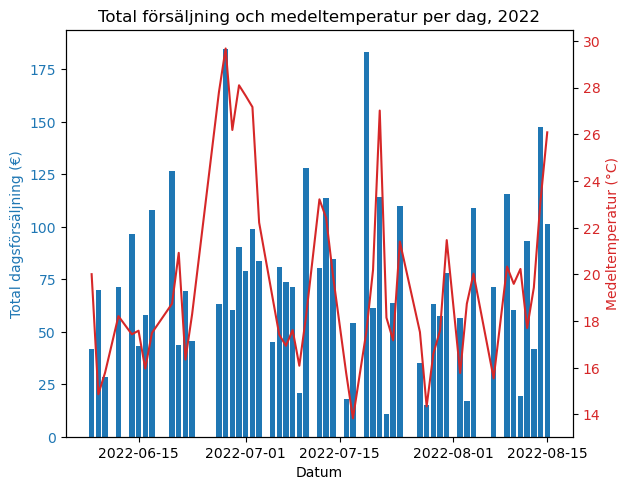

In [8]:
# visualisera tabellerna i en gemensam graf
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Datum')
ax1.set_ylabel('Total dagsförsäljning (€)', color=color)
ax1.bar(merged_data.index, merged_data['Price (Gross)'], color=color, width=0.8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Medeltemperatur (°C)', color=color)
ax2.plot(merged_data.index, merged_data['Air temperature [°C]'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Total försäljning och medeltemperatur per dag, 2022")
plt.show()

In [9]:
# deskriptiv statistik (datapunkter, medelvärde, standardavvikelse, minimivärde, maximivärde och kvartiler)
merged_data.describe()

,Price (Gross),Air temperature [°C]
count,52.000000,52.000000
mean,74.182692,19.741132
std,39.010125,3.968817
min,11.000000,13.834545
25%,45.375000,17.355455
50%,70.750000,18.519091
75%,97.125000,21.418191
max,184.500000,29.678182


In [10]:
# korrelationen mellan försäljning och medeltemperatur
merged_data.corr()

,Price (Gross),Air temperature [°C]
Price (Gross),1.000000,0.420308
Air temperature [°C],0.420308,1.000000


In [11]:
# samvariansen mellan försäljning och medeltemperatur
merged_data.cov()

,Price (Gross),Air temperature [°C]
Price (Gross),1521.789891,65.073831
Air temperature [°C],65.073831,15.751509
